# French Motor Third Party Liability
# *Descriptive Statistics*

## 1. Introduction
This notebook is based on the excellent work produced by the Swiss Association of Actuaries in 2021. Link to the original content can be found here: https://github.com/JSchelldorfer.

The purpose of this notebook is to perform similar analyses using Python (as opposed to R in the original workings). Basic understanding of numpy, pandas, matplotlib are required to follow through this notebook.

## 2. Data Source
The open sourced French Motor Third Party Liability claims data can be downloaded from the OpenML website:
- https://www.openml.org/d/41214
- https://www.openml.org/d/41215

You can download it by executing the following lines in your Google Colab:

> `from sklearn.datasets import fetch_openml`

> `freq = fetch_openml(data_id=41214, as_frame=True).frame`

Note if you download data directly from OpenML website (*which is the way I have done it*), numbers shown will be slightly different to that used in the JSchelldorfer's work. 

If you want to fully replicate the numbers shown in the lecture notes, you will want to download the `.RData` file from the GitHub repository.

## 3. Importing Data
We will first explore our dataset. 

First, import basic libraries for data manipulations. We are using matplotlib and seaborn for visualisation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from copy import deepcopy

The following code makes matplotlib graphs appear and be stored within the notebook.

In [ ]:
%matplotlib inline

Two ways to download data:

1.   OpenML
2.   JSchelldorfer's Github



In [ ]:
from sklearn.datasets import fetch_openml
freq = fetch_openml(data_id=41214, as_frame=True).frame

## 4. Exploring Data

There are 678,013 rows of insurance policies records and 12 variables.

In [ ]:
freq.shape

(678013, 12)

Showing the top 5 records.

In [ ]:
freq.head(5)

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1.0,0.10,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82
1,3.0,1.0,0.77,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82
2,5.0,1.0,0.75,B,6.0,2.0,52.0,50.0,B12,Diesel,54.0,R22
3,10.0,1.0,0.09,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72
4,11.0,1.0,0.84,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72


Listing out all column names.

In [ ]:
freq.columns

Index(['IDpol', 'ClaimNb', 'Exposure', 'Area', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region'],
      dtype='object')

Data definitions:
- IDPol: Policy ID, used to link to severity data set
- ClaimNb: Claim numbers during exposure period
- Exposure: Period of exposure for a policy in year(s)
- VehPower:  Car power, in categorical format
- VehAge: Car age, in continuous value format
- DrivAge: Driver's age in years, in continuous value format
- BonusMalus: Bonus / Malus rating, <100 means bonus, >100 means malus, in continous value format
- VehBrand: Car brand, in categorical format
- VechGas: Fuel type, in categorical format
- Area: Density rating of the area car driver lives in, in categorical format
- Density: Density rating, number of inhabitants per km^2, in continous value format
- Region: Policy region in France, in categorical format

Now, check inputs data types.

In [ ]:
freq.dtypes

IDpol          float64
ClaimNb        float64
Exposure       float64
Area          category
VehPower       float64
VehAge         float64
DrivAge        float64
BonusMalus     float64
VehBrand      category
VehGas          object
Density        float64
Region        category
dtype: object

Change IDpol from `float` to `object`. This is so that IDpol won't get picked up if we use a `describe()` method as it will be meaningless.

In [ ]:
freq['IDpol'] = freq['IDpol'].astype(object)

Now, rerun `dtypes` and use `describe` on our data to see basic statistics.

In [ ]:
freq.dtypes

IDpol           object
ClaimNb        float64
Exposure       float64
Area          category
VehPower       float64
VehAge         float64
DrivAge        float64
BonusMalus     float64
VehBrand      category
VehGas          object
Density        float64
Region        category
dtype: object

In [ ]:
freq.describe()

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405
std,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564
min,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000
25%,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000
50%,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000
75%,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000
max,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000


## 5. Prepping for Visualisation
For better visualisation, we are applying the following simplification to the data.
We would have very busy, difficult to read plots if we haven't done such adjustments.
We can refer to original datasets `freq` when we come to GLM fitting *(next Colab note)*.

In [ ]:
df_freq = deepcopy(freq)
df_freq['ClaimNb'] = df_freq['ClaimNb'].apply(lambda x: 5 if x > 5 else x)
df_freq['VehAge'] = df_freq['VehAge'].apply(lambda x: 20 if x > 20 else x)
df_freq['DrivAge'] = df_freq['DrivAge'].apply(lambda x: 90 if x > 90 else x)
df_freq['BonusMalus'] = df_freq['BonusMalus'].apply(lambda x: 150 if x > 150 else round(x / 10) * 10)
df_freq['Density'] = df_freq['Density'].apply(lambda x: round(math.log(x)))
df_freq['Exposure'] = df_freq['Exposure'].apply(lambda x: 1. if x > 1 else x)

Now we have much smaller bin counts for BonusMalus, capped DriverAge, capped VehicleAge etc.
These will help make visualising the data clearer.

In [ ]:
df_freq.describe()

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,0.053192,0.528545,6.454631,6.976124,45.496871,59.740801,5.956151
std,0.238202,0.364081,2.050906,5.398963,14.129872,15.899992,1.867370
min,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,0.000000
25%,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,5.000000
50%,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,6.000000
75%,0.000000,0.990000,7.000000,11.000000,55.000000,60.000000,7.000000
max,5.000000,1.000000,15.000000,20.000000,90.000000,150.000000,10.000000


Checking how many records are with nil / non-nil ClaimNb.

In [ ]:
df_freq['freq'] = df_freq['ClaimNb'] / df_freq['Exposure']
df_freq_clm = df_freq[df_freq['ClaimNb'] > 0]
print('All records: ' + str(len(df_freq)))
print('All records with zero ClaimNb: ' + str(len(df_freq[df_freq['ClaimNb'] == 0])))
print('All records with non-zero ClaimNb: ' + str(len(df_freq_clm)))

All records: 678013
All records with zero ClaimNb: 643953
All records with non-zero ClaimNb: 34060


## 6. Graphing

We now explore the datasets with different kind of `seaborn` plots.

## 6.1. Exposure, Claim Count and Frequency

#### 6.1.1 Histogram and Boxplot on Exposure

*Histogram, Boxplot*


The following codes show
- how Exposure is distributed by a histogram
- how Exposure is distributed by a boxplot
- counts of policies by ClaimNb by a histogram

From below, we can tell that
- the min value of Exposure is 0.002732 or 0.002732 * 365 = 1 day.
- the max value is 1, i.e. 1 year.
where Exposure is defined as the duration of policy in year, i.e. years-at-risk.

Only roughly 25% of Exposure are full year. This feels strange. Is this a norm in France?


,Exposure
ExposureGrp,
Full Year,24.97725
not Full Year,75.02275


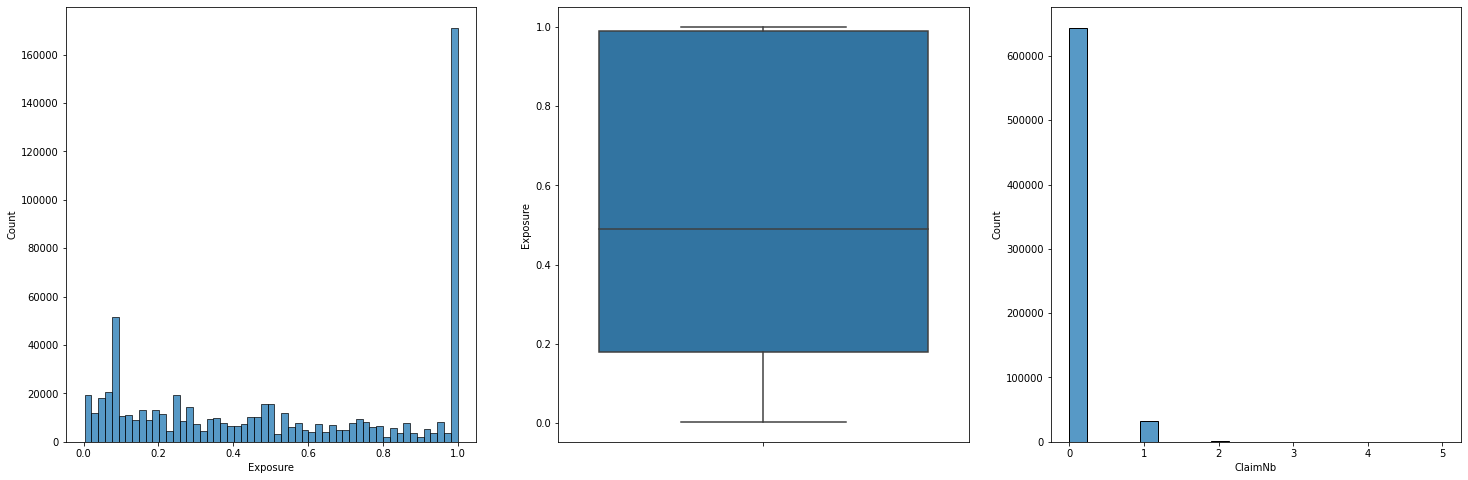

In [ ]:
plt.subplots(nrows=1, ncols=3, figsize=(25, 8))
plt.subplot(1, 3, 1)
sns.histplot(df_freq, x='Exposure')
plt.subplot(1, 3, 2)
sns.boxplot(y="Exposure", data=df_freq)
plt.subplot(1, 3, 3)
sns.histplot(df_freq, x='ClaimNb')
df_freq['ExposureGrp'] = df_freq['Exposure'].apply(lambda x: 'Full Year' if x == 1 else 'not Full Year')
df_freq[['Exposure', 'ExposureGrp']].groupby('ExposureGrp').count().apply(lambda x: 100 * x / float(x.sum()))

#### 6.1.2. Stacked Bar Plot on Exposure and Driver Age

*Histogram & Hue*

Binning data by Driver Age and make it as hue in a Exposure histogram chart.

Lapses tend to be from younger aged drivers?

<AxesSubplot:xlabel='Exposure', ylabel='Count'>

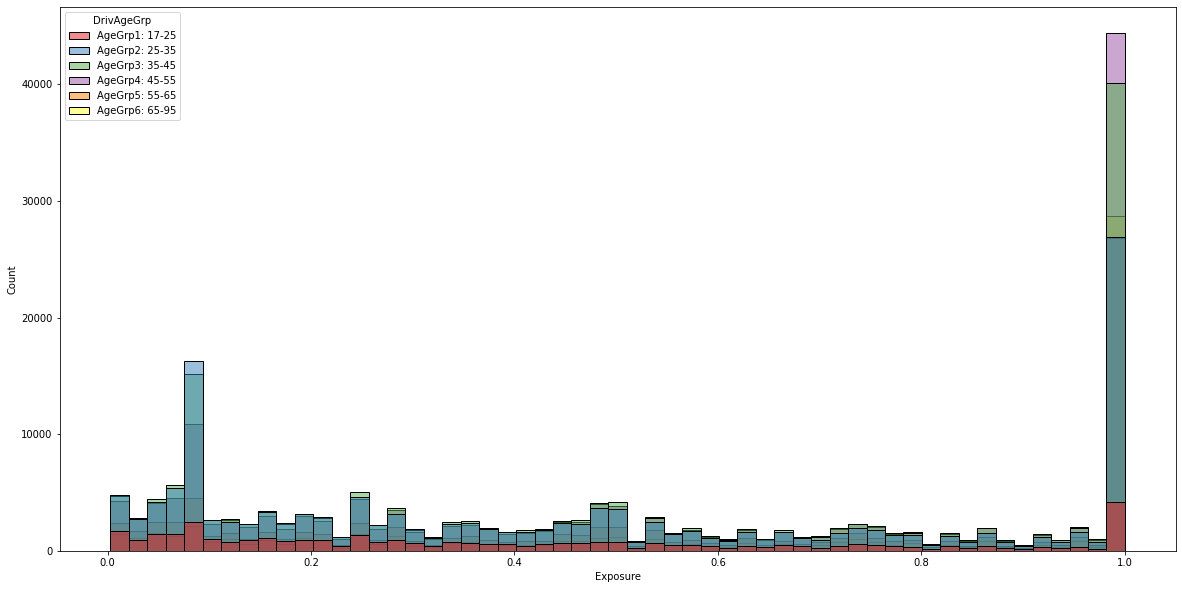

In [ ]:
bins = [17, 25, 35, 45, 55, 65, 95]
labels = ['AgeGrp1: 17-25', 'AgeGrp2: 25-35', 'AgeGrp3: 35-45', 'AgeGrp4: 45-55', 'AgeGrp5: 55-65', 'AgeGrp6: 65-95']
df_freq['DrivAgeGrp'] = pd.cut(df_freq['DrivAge'], bins=bins, labels=labels)
plt.figure(figsize=(20, 10))
sns.histplot(df_freq, x='Exposure', hue='DrivAgeGrp', palette='Set1')

#### 6.1.3. More Box Plots in a Subplot
*Subplot, Boxplot*

Plotting a 2 by 3 charts that examine the distribution of Exposure by various dimensions.

<AxesSubplot:xlabel='BonusMalus', ylabel='Exposure'>

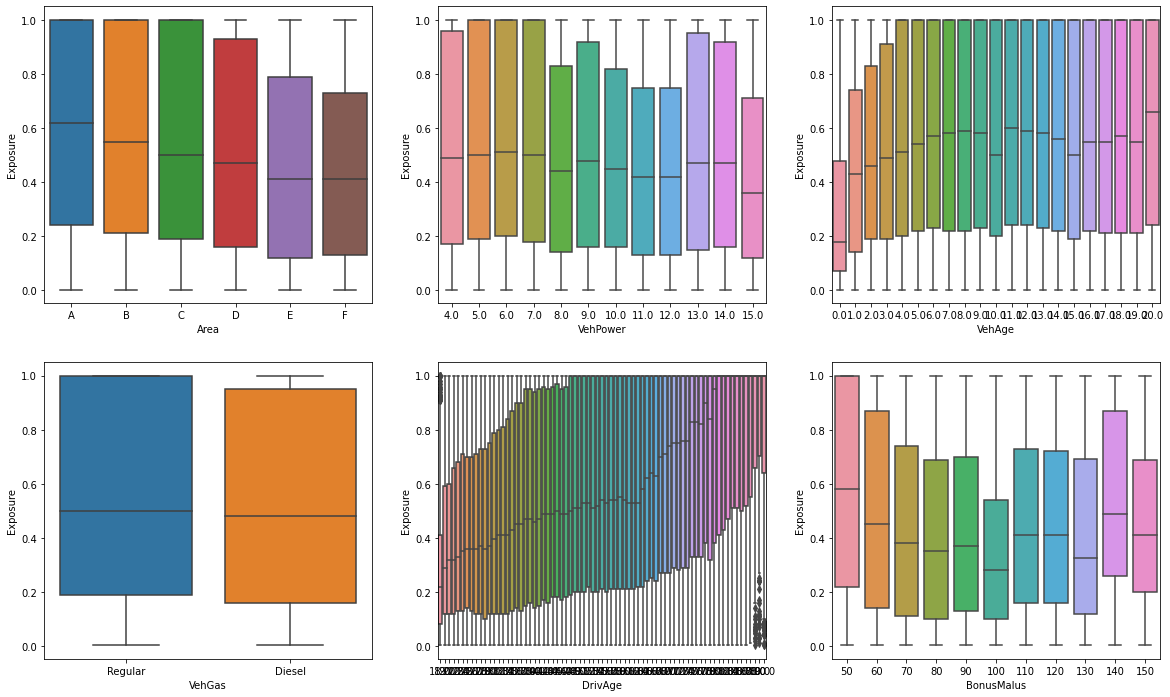

In [ ]:
plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
plt.subplot(2, 3, 1)
sns.boxplot(y='Exposure', x='Area', data=df_freq)
plt.subplot(2, 3, 2)
sns.boxplot(y='Exposure', x='VehPower', data=df_freq)
plt.subplot(2, 3, 3)
sns.boxplot(y='Exposure', x='VehAge', data=df_freq)
plt.subplot(2, 3, 4)
sns.boxplot(y='Exposure', x='VehGas', data=df_freq)
plt.subplot(2, 3, 5)
sns.boxplot(y='Exposure', x='DrivAge', data=df_freq)
plt.subplot(2, 3, 6)
sns.boxplot(y='Exposure', x='BonusMalus', data=df_freq)

#### 6.1.4. Combo Plot - Marginal Frequencies vs Portfolio Frequency
*Combo Plot: Barplot & Lineplot/Pointplot*

Calculate Portolio Frequency. We need this to plot against any Observed / Marginal Frequencies.

In [ ]:
# Portfolio frequency
p_freq = sum(df_freq['ClaimNb']) / sum(df_freq['Exposure'])
print(p_freq)

0.10063899259492365


Creating a function to run a combo plot:
1. Exposure of the selected dimension (bar chart)
2. Frequency observed in each group of the selected dimension & portfolio frequency (line chart)
3. Marginal frequencies with 1 to 3 S.Ds in different shades
4Portfolio frequency as a horizontal line

In [ ]:
def runmultiplot(data, dimension):
    """
    :param data: should be df_freq
    :param dimension: dimension to use
    :return: multiplots
    """
    agg_func1 = {'ClaimNb': [sum], 'Exposure': [sum]}
    temp1 = data.groupby(by=[dimension]).agg(agg_func1).reset_index()
    temp1['MarginalFreq'] = temp1[('ClaimNb', 'sum')] / temp1[('Exposure', 'sum')]
    temp1['ClaimNbGrp'] = temp1[('ClaimNb', 'sum')]
    temp1['ExposureGrp'] = temp1[('Exposure', 'sum')]
    temp1['Stdv'] = np.sqrt(temp1['ClaimNbGrp']) / temp1['ExposureGrp']
    temp1['PortfolioFreq'] = p_freq
    temp1['Rank'] = temp1[dimension].rank(method='dense') - 1
    # the reason why we need this additional Rank step
    # https://stackoverflow.com/questions/64402358/seaborn-lineplot-and-barplot-dont-align-in-the-x-axis
    # barplot does not plot at actual x values. It treats x variables as categorical.
    # whereas a lineplot uses the actual x values
    # two options:
    # 1. use pointplot instead
    # 2. use rank and keep lineplot

    fig, ax1 = plt.subplots(figsize=(20, 13))
    sns.barplot(x=dimension, y='ExposureGrp', data=temp1,
                estimator=sum, order=sorted(temp1[dimension].unique()), alpha=0.7, ax=ax1)
    ax1.bar_label(ax1.containers[0]) # add value to the bar
    ax1.set_xticklabels(sorted(temp1[dimension].unique()))
    ax2 = ax1.twinx() # share x axis
    sns.lineplot(x='Rank', y='MarginalFreq', data=temp1,
                 label=dimension, marker='o', markersize=14, ax=ax2)
    nstdv = 1
    for nstdv in range(1, 4):
        ax2.fill_between(temp1['Rank'],
                         (temp1['MarginalFreq'] - nstdv * temp1['Stdv']),
                         (temp1['MarginalFreq'] + nstdv * temp1['Stdv']),
                         alpha=0.25,
                         label='nstd={}'.format(nstdv))
    ax2.legend(loc='upper left')
    ax2.set_yticklabels([])
    ax3 = ax2.twinx()
    sns.lineplot(x='Rank', y='PortfolioFreq', data=temp1,
                 label='Portfolio', marker='o', markersize=14, color='red', ax=ax3)
    plt.title('Freq by ' + dimension + ' vs Portfolio Freq')

Note: if you are seeing this error message: `AttributeError: 'AxesSubplot' object has no attribute 'bar_label'`, it means that you do not have the right matplotlib library installed. Please execute the following code:

`!pip install matplotlib --upgrade`

In [ ]:
#!pip install matplotlib --upgrade

Frequency increases steadily as we cross Area group.

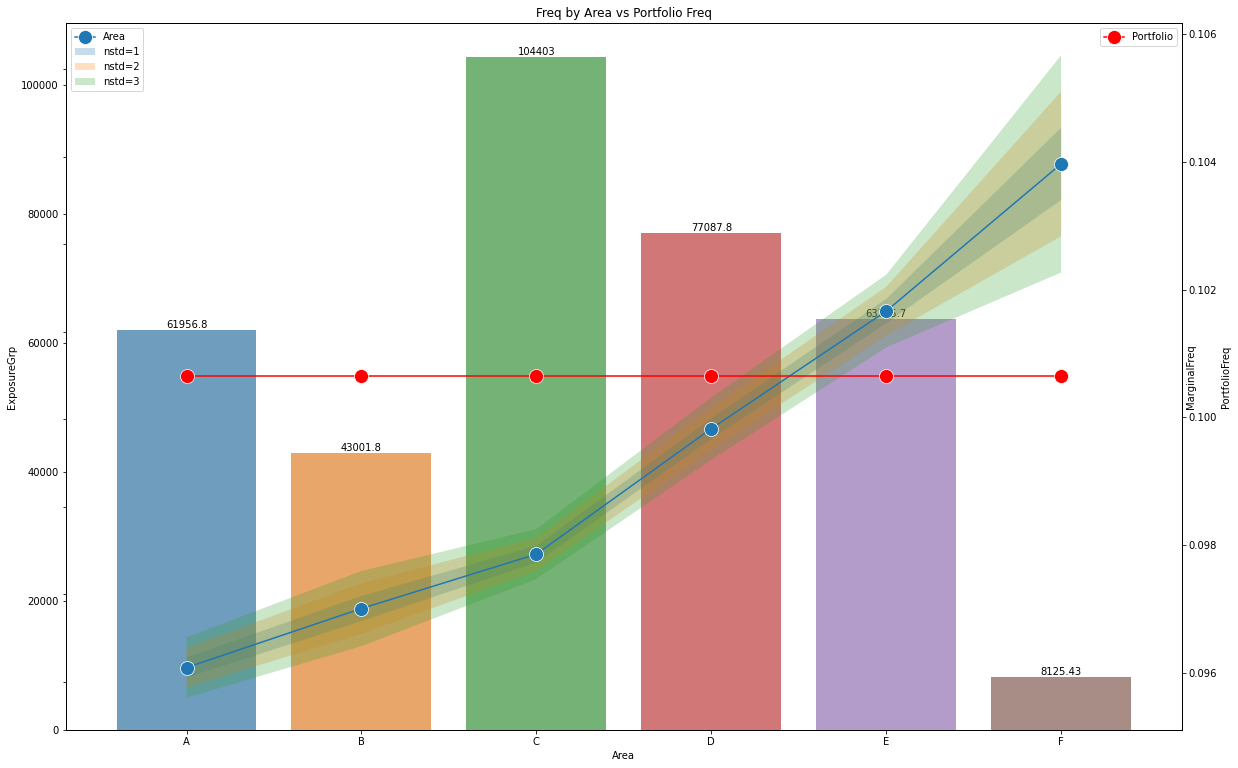

In [ ]:
runmultiplot(df_freq, 'Area')

Frequency dips in VehPower group 8.
Observed frequency in VehPower group 12 and beyond should be taken cautiously due to low volume.

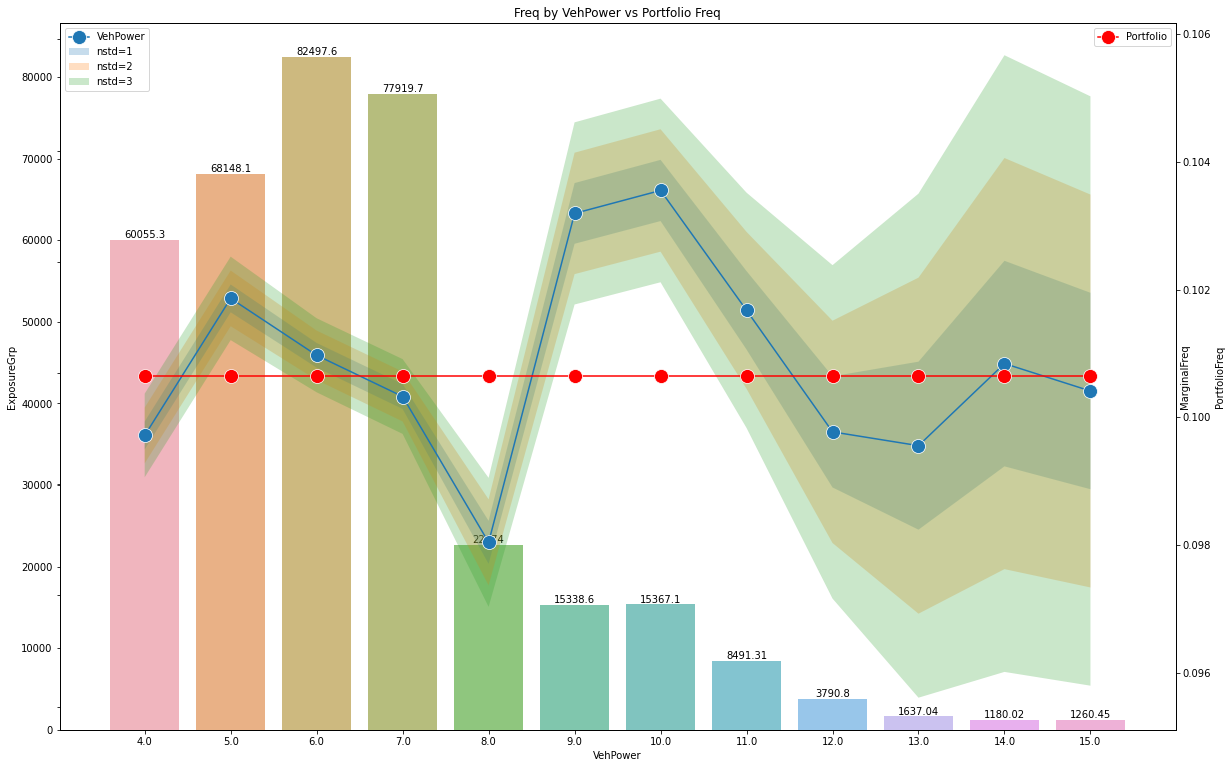

In [ ]:
runmultiplot(df_freq, 'VehPower')

Can observe 'Accident Hump' here, where frequency is the highest in young age (18 year-old) then steadily decreases until age 25-30.
Sparse data at the both end of the DrivAge distribution.

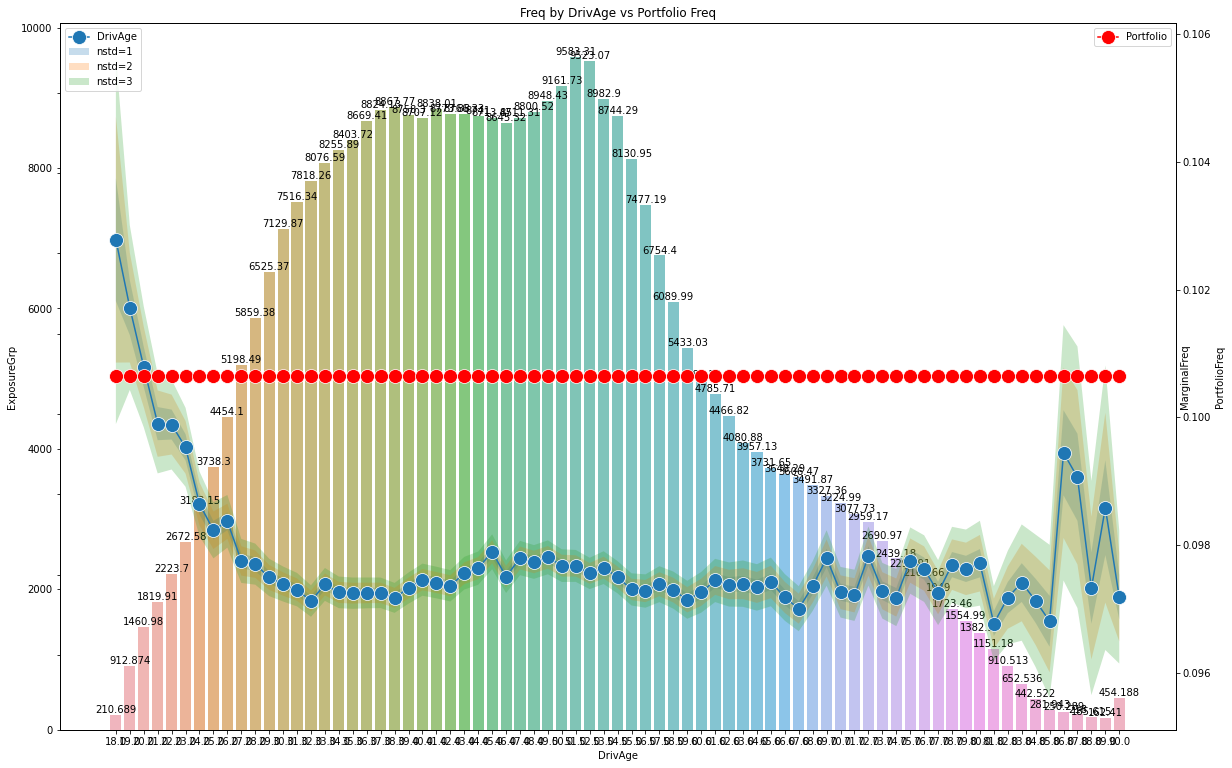

In [ ]:
runmultiplot(df_freq, 'DrivAge')

Strong positive correlation here between BonusMalus and frequency.
This is as expected. BolusMalus system is effective at influencing claims experience.

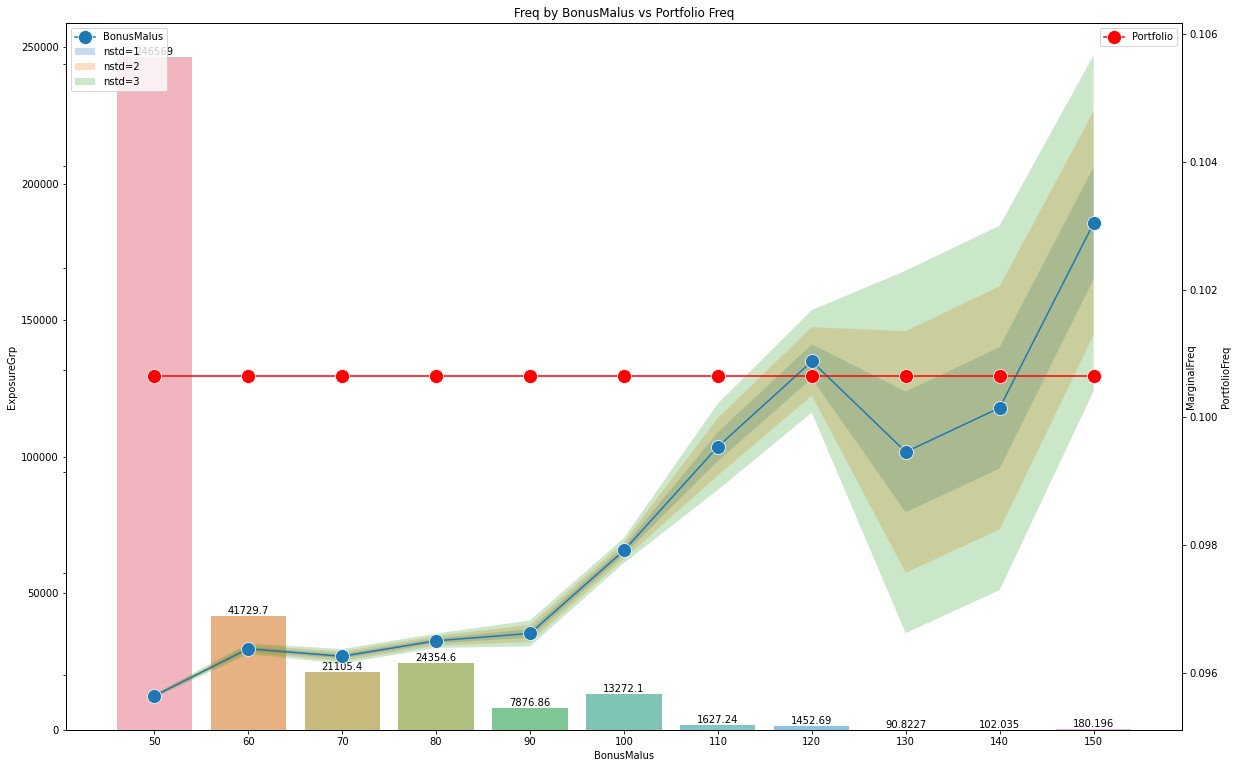

In [ ]:
runmultiplot(df_freq, 'BonusMalus')

Unfortunately we do not have descriptive data for VechBrand.
B1 and B2 are the most popular brand and each has quite a similar marginal frequency, both are lower than the portfolio frequency.

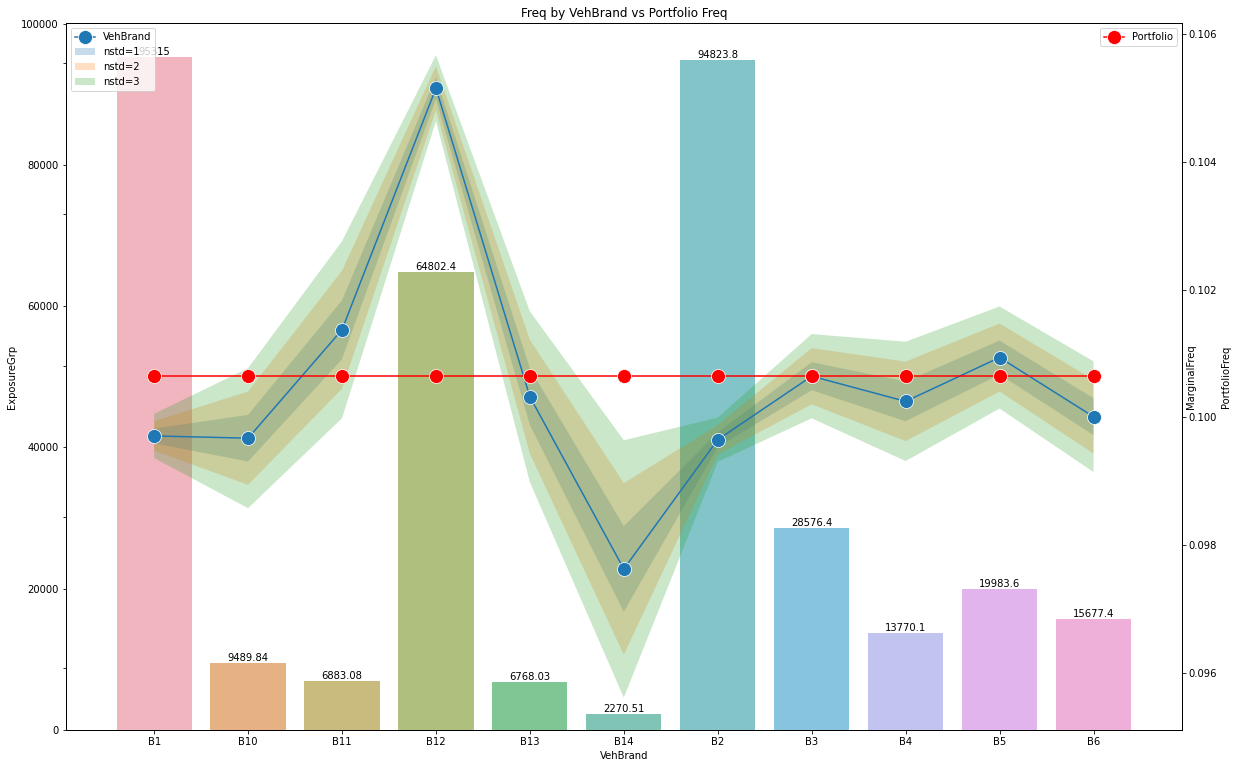

In [ ]:
runmultiplot(df_freq, 'VehBrand')

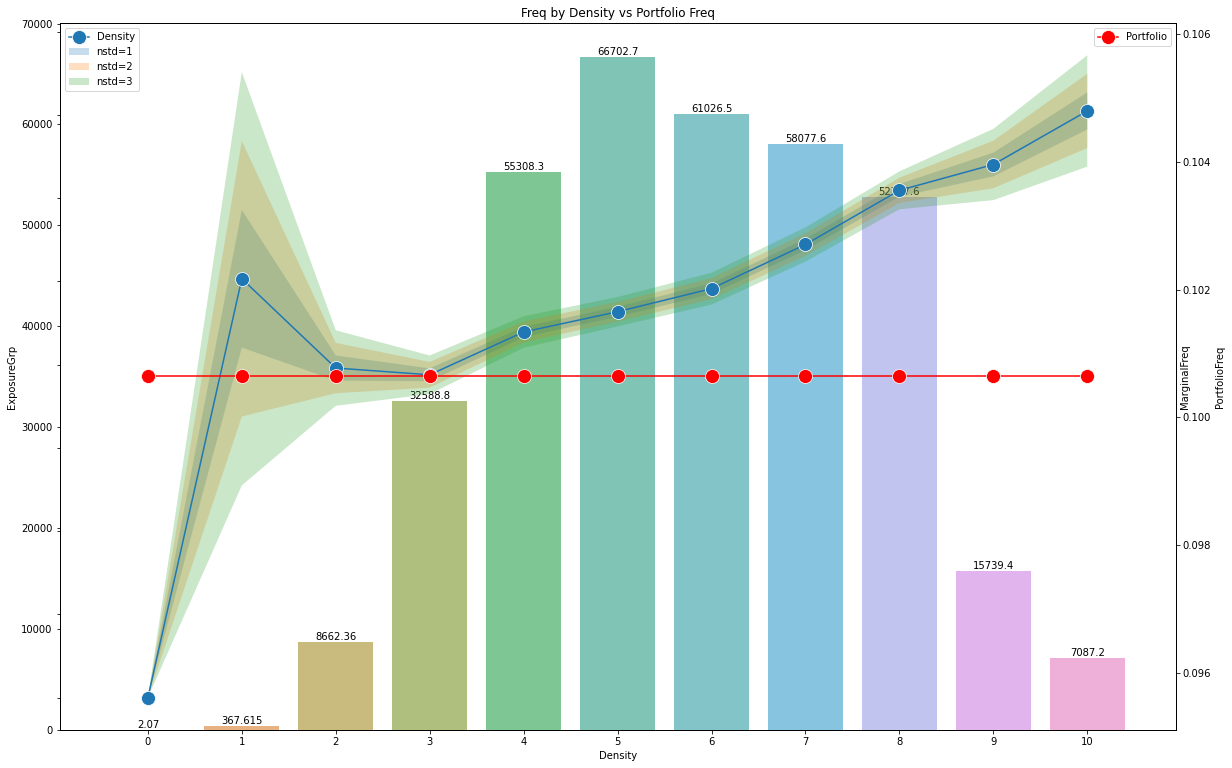

In [ ]:
runmultiplot(df_freq, 'Density')

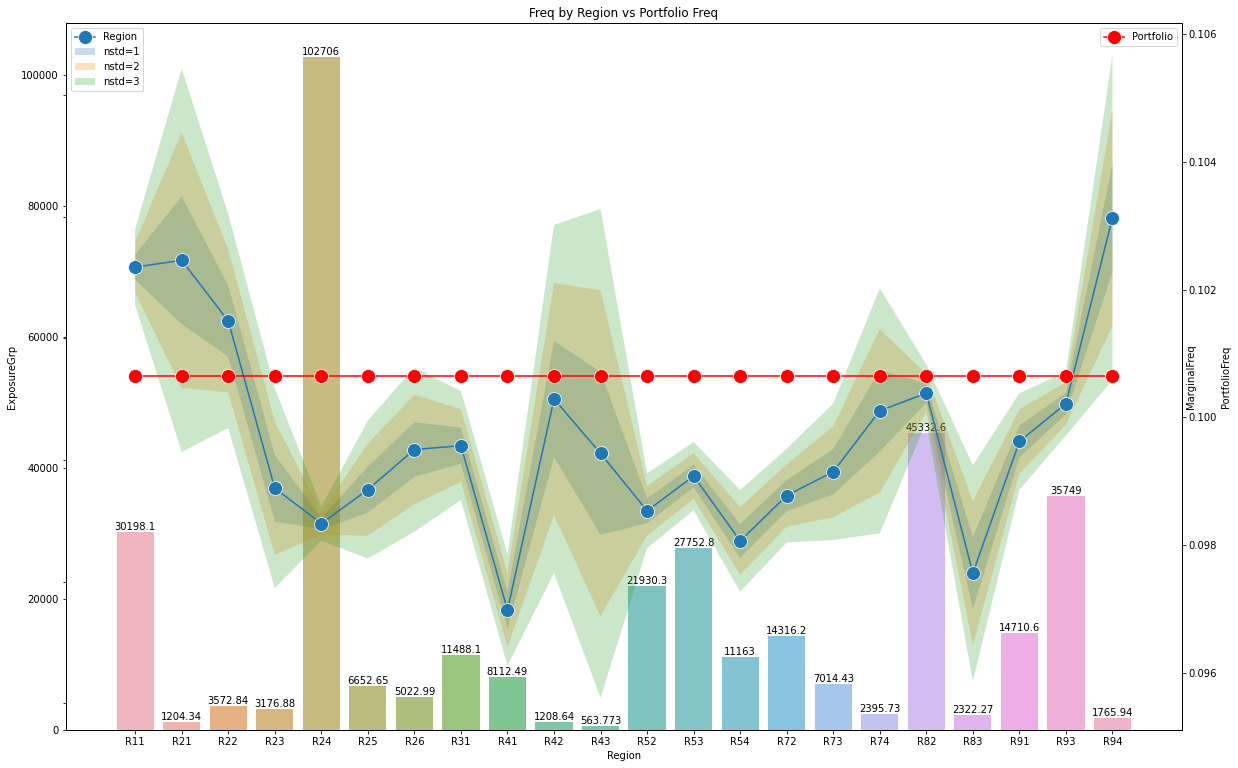

In [ ]:
runmultiplot(df_freq, 'Region')

### 6.2. Two Dimensional Plots
*colour palette & heatmap*
To detect collinearity, we will run some two-dimensional plots of the portfolio distribution of some variables.

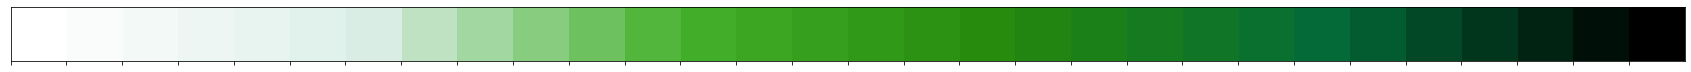

In [ ]:
# Here is how you can create your own colour palette for use in different graphs.
# E.g. you might want to import your corporate colour for consistency.
custom_colour = [(1, 1, 1), (221 / 255, 239 / 255, 232 / 255), (67 / 255, 176 / 255, 42 / 255),
             (38 / 255, 137 / 255, 13 / 255), (4 / 255, 106 / 255, 56 / 255), (0, 0, 0)]
custom_pal = sns.palplot(sns.blend_palette(custom_colour, n_colors=30))

#### 6.2.1. Calculate Pearson Correlation

This is the default `corr()` method in pandas.

Pearson correlation measures the linear relationship between two continuous variables.

You can use `mask` in `sns.heatmap` to adjust the graph so that it only show lower triangle.

<AxesSubplot:>

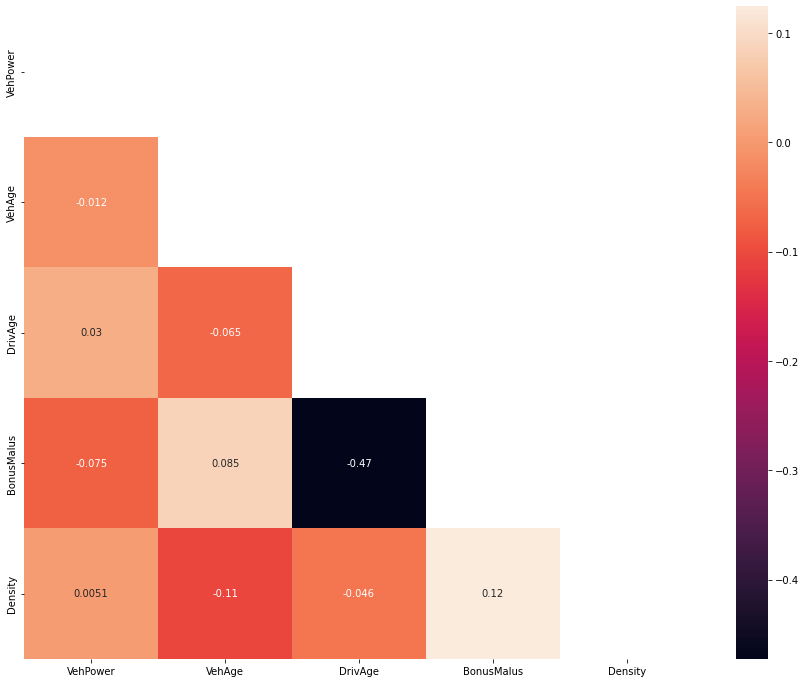

In [ ]:
plt.figure(figsize=(15,12))
#df_corr = df_freq.drop(['IDpol', 'freq', 'ClaimNb', 'Exposure'], axis=1)
df_corr = df_freq[['VehPower','VehAge','DrivAge','BonusMalus','Density']]
mask_ut = np.triu(np.ones(df_corr.corr().shape)).astype(bool)
sns.heatmap(df_corr.corr(), mask=mask_ut, annot=True)

#### 6.2.2. Calculate Spearman Correlation

We can pass `method='spearman` into the `corr()` function to calculate this.
The Spearman correlation measures the monotonic relationship, the coefficient is based on the ranked values for each variable rather than the raw data.
In other words, it measures the relationship in which the variables tend to move together but not necessarily at a constant rate.

In [ ]:
df_corr

,VehPower,VehAge,DrivAge,BonusMalus,Density
0,5.0,0.0,55.0,50,7
1,5.0,0.0,55.0,50,7
2,6.0,2.0,52.0,50,4
3,7.0,0.0,46.0,50,4
4,7.0,0.0,46.0,50,4
...,...,...,...,...,...
678008,4.0,0.0,54.0,50,8
678009,4.0,0.0,41.0,100,9
678010,6.0,2.0,45.0,50,7
678011,4.0,0.0,60.0,50,5


<AxesSubplot:>

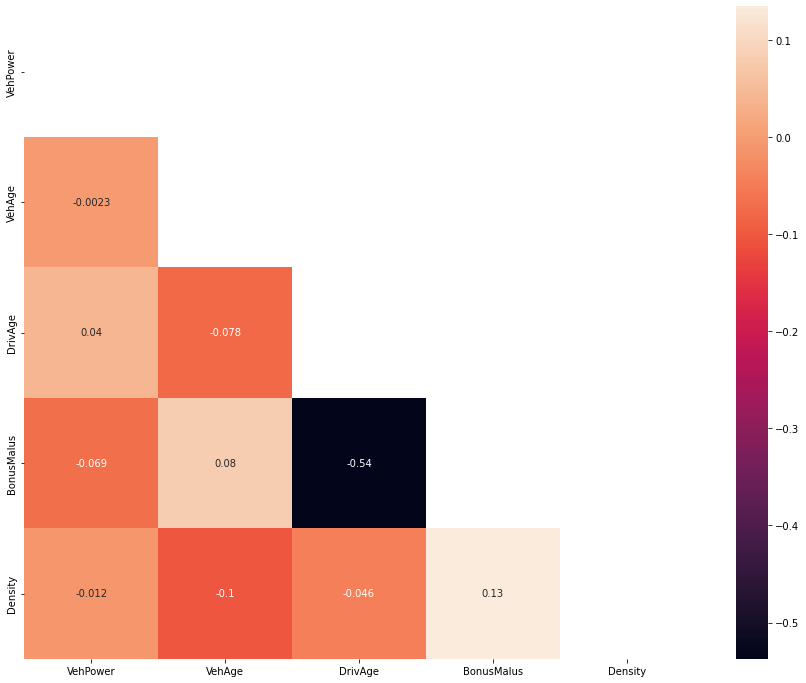

In [ ]:
plt.figure(figsize=(15,12))
df_corr = df_freq[['VehPower','VehAge','DrivAge','BonusMalus','Density']]
mask_ut = np.triu(np.ones(df_corr.corr(method='spearman').shape)).astype(bool)
sns.heatmap(df_corr.corr(method='spearman'), mask=mask_ut, annot=True)

#### 6.2.3. Contour Plots

Creating a `runheapmap` function to examine Exposure, ClaimNb, Freq distribution by selected x and y dimensions.

In [ ]:
def runheatmap(data, x, y, value, colour=None):
    """
    :param data: should be df_freq
    :param x: x dimension
    :param y: y dimension
    :param value: options are: 'Exposure', 'ClaimNb', 'Freq'
    :param colour: None
    :return: heatmap
    """

    if value in ('Exposure', 'ClaimNb'):
        data_pv1 = data.pivot_table(values=value, index=x, columns=y, aggfunc=np.sum)
        plt.figure(figsize=(15,12))
        sns.heatmap(data_pv1, cmap=colour)
    if value == 'Freq':
        data_pv1 = data.pivot_table(values='ClaimNb', index=x, columns=y, aggfunc=np.sum)
        data_pv2 = data.pivot_table(values='Exposure', index=x, columns=y, aggfunc=np.sum)
        data_pv3 = data_pv1 / data_pv2
        plt.figure(figsize=(15,12))
        sns.heatmap(data_pv3, cmap=colour)


These plots are useful to detech collinearity in the feature components.

We can observe the following by looking at Exposure spread against some variable pairs:
- Area code has a slight +ve relationshiop with the Bonus Malus score
- Area code has a slight -ve relationship with the VehAge and DrivAge
- Higher Bonus Malus score with lower VehPower
- Younger people drives newer cars

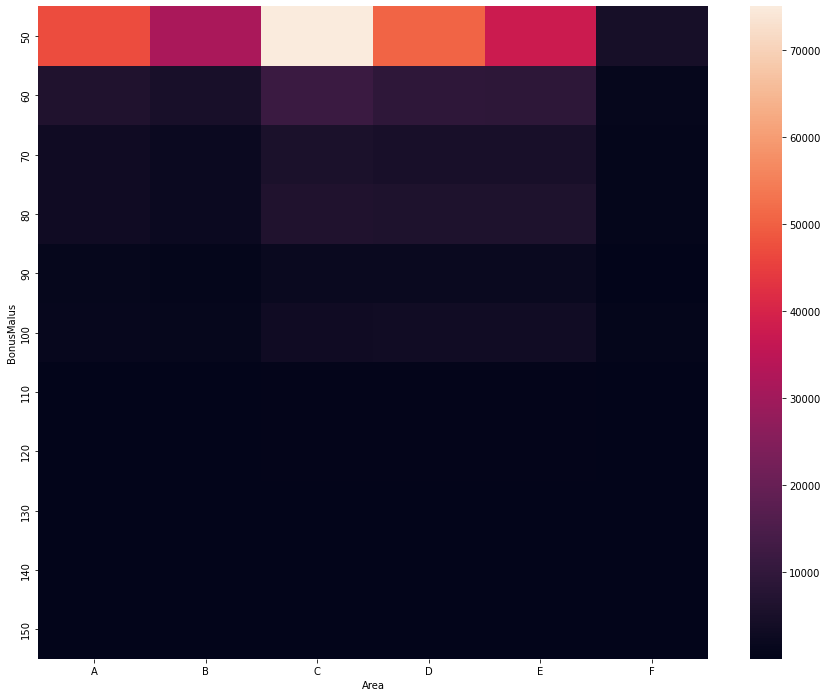

In [ ]:
runheatmap(df_freq, 'BonusMalus', 'Area', 'Exposure')

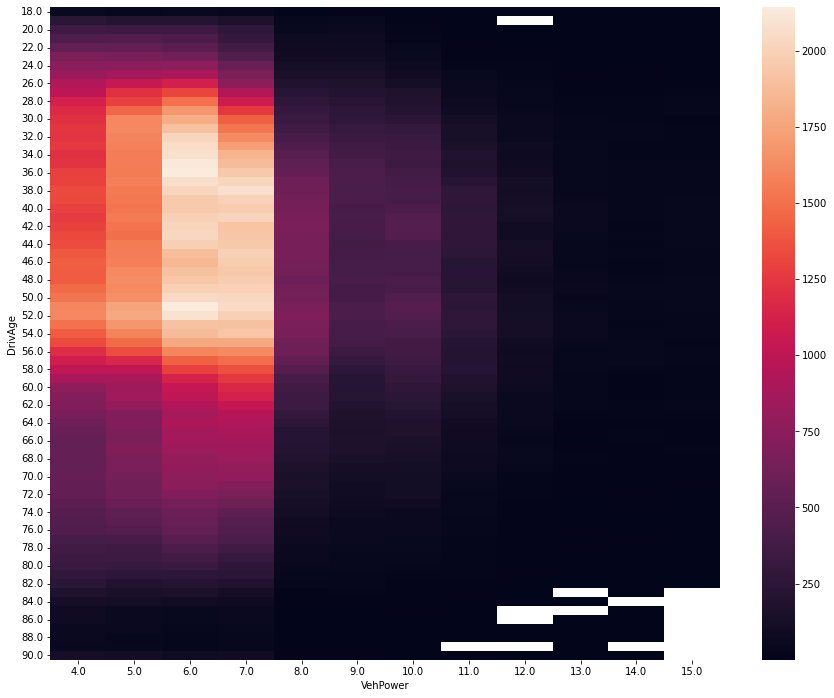

In [ ]:
runheatmap(df_freq, 'DrivAge', 'VehPower', 'Exposure')

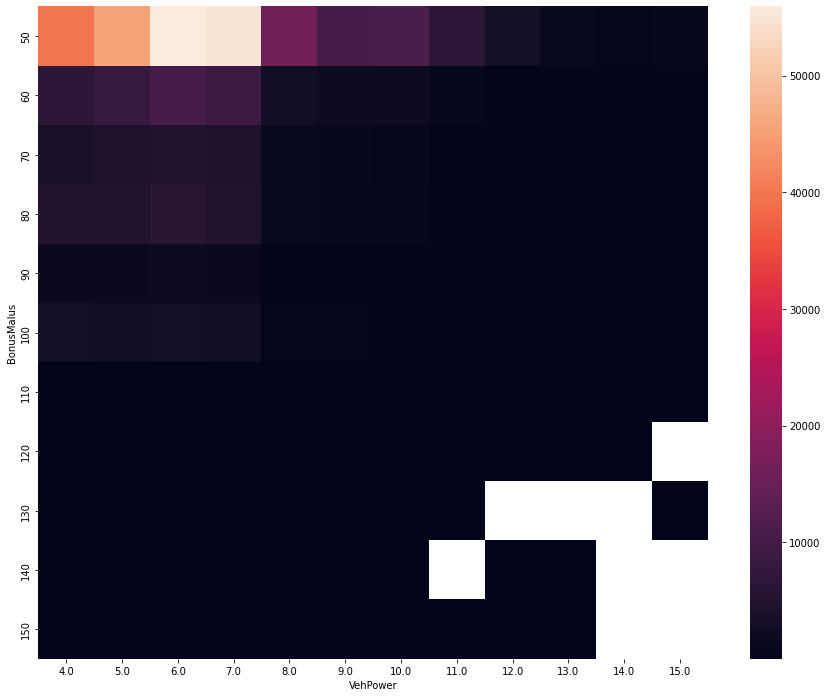

In [ ]:
runheatmap(df_freq, 'BonusMalus', 'VehPower', 'Exposure')

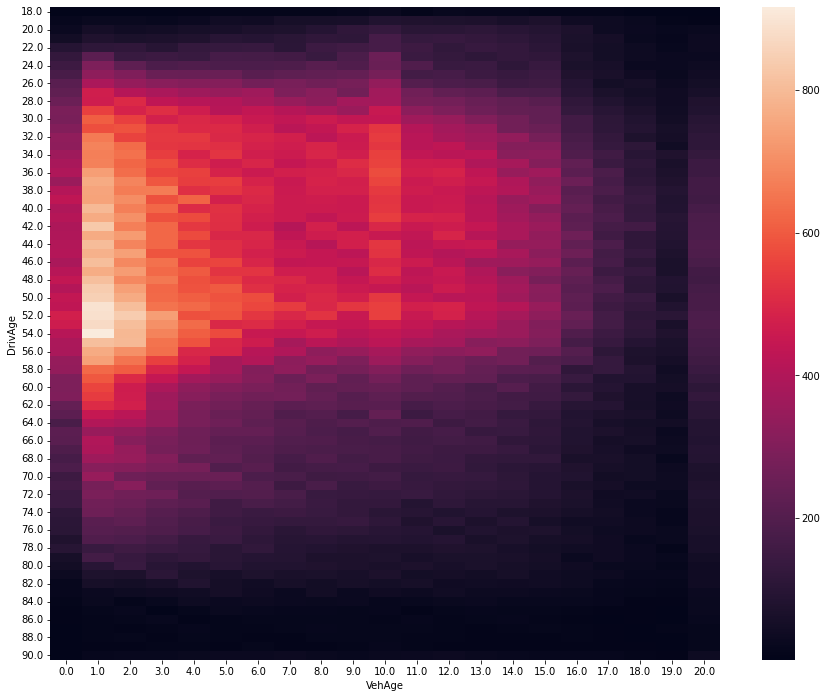

In [ ]:
runheatmap(df_freq, 'DrivAge', 'VehAge', 'Exposure')

## 7. Next
We will look at implementing GLM to model claims frequency.